ID                                   1.051087
Household Income                     1.626014
Household wealth score               1.198452
Household size                       0.185281
Rainfall for the month               0.000000
Average temperature for the month    0.000624
Travel time                          0.982473
Shortest distance                    0.065797
Amount spent on water in a month     1.263688
Volume of water consumed in lpcd     1.064048
Willingness to pay                   1.154542
dtype: float64
ID                                   1
Household Income                     1
Household wealth score               1
Household size                       5
Rainfall for the month               7
Average temperature for the month    3
Travel time                          1
Shortest distance                    4
Amount spent on water in a month     2
Volume of water consumed in lpcd     6
Willingness to pay                   1
dtype: int32


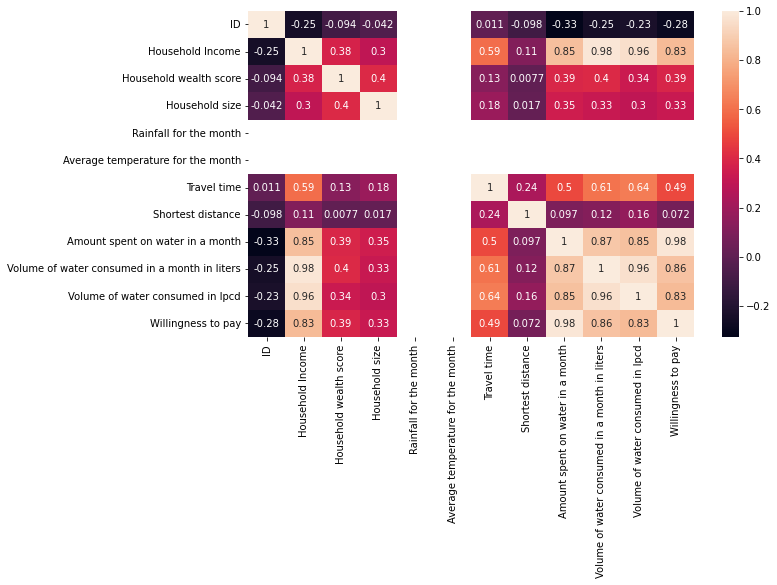

In [36]:
# FEATURE SELECTION
import pandas as pd
import numpy as np

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    

# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best = SelectKBest(mutual_info_classif, k=5)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    print(scores)
    
# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=5)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    print(feature_ranking)

# Testing the code
# Reading data
data = pd.read_csv('jan.csv')

#Separate target variable from input variables
X = data.drop(columns='Volume of water consumed in a month in liters', axis=1)
Y = data_var['Volume of water consumed in a month in liters']

# Testing the feature selection code
pearson_correlation(data)

information_gain(X, Y)

recursive_feature_elimination(X, Y)
